# IMPORTATION DES DONNEES ET DATAVIZ

In [39]:
#Import de toutes les librairies nécessaires

import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter
from sklearn.datasets import make_classification
from xgboost import plot_importance
from matplotlib import pyplot

from tensorflow.keras.layers import Input, Dense #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model


In [5]:
#Création des DF
df_users=pd.read_csv("users.csv")
df_places=pd.read_csv("places.csv",low_memory=False)
df_caract=pd.read_csv("caracteristics.csv",encoding='ISO-8859-1',low_memory=False)
df_veh=pd.read_csv("vehicles.csv")

(1876005, 13)


<Figure size 720x720 with 0 Axes>

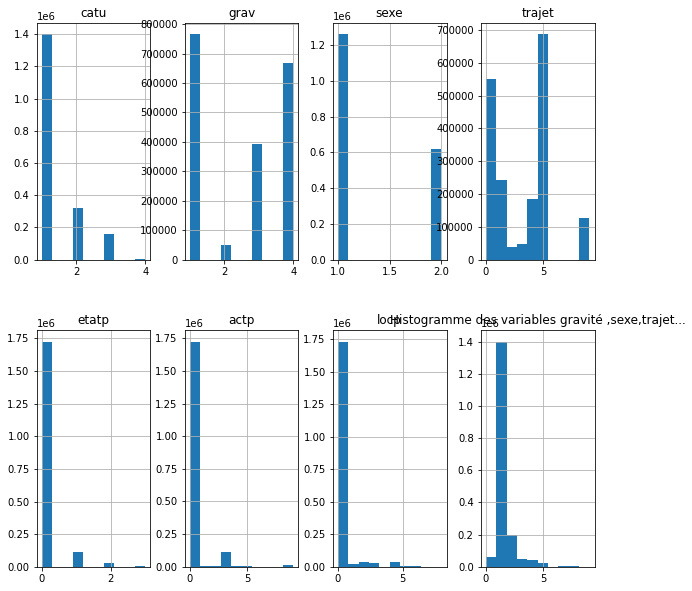

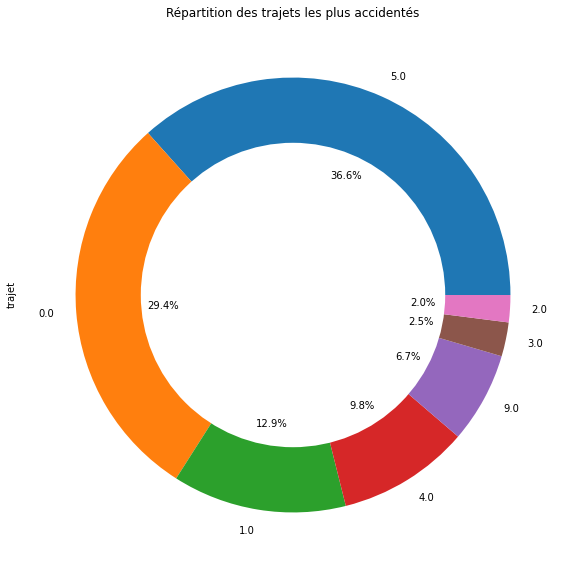

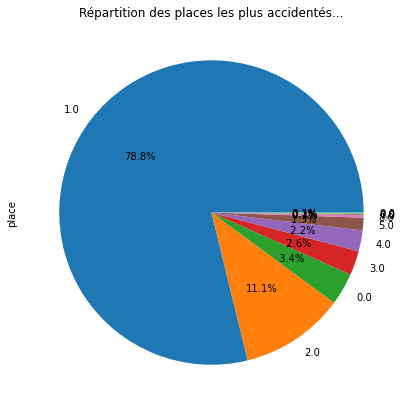

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


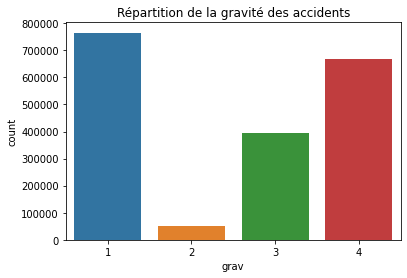

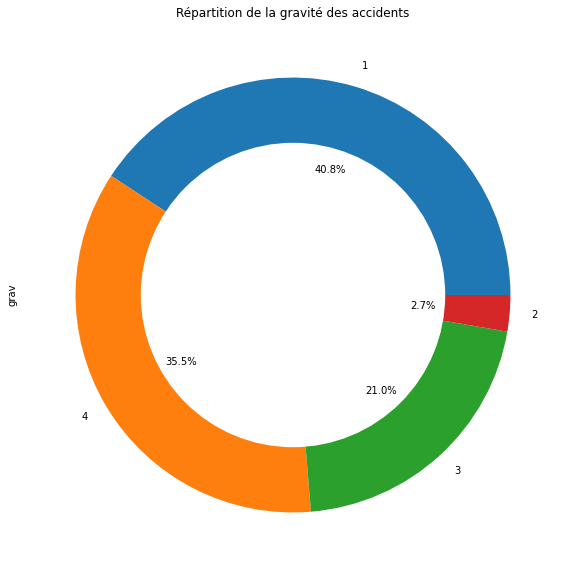

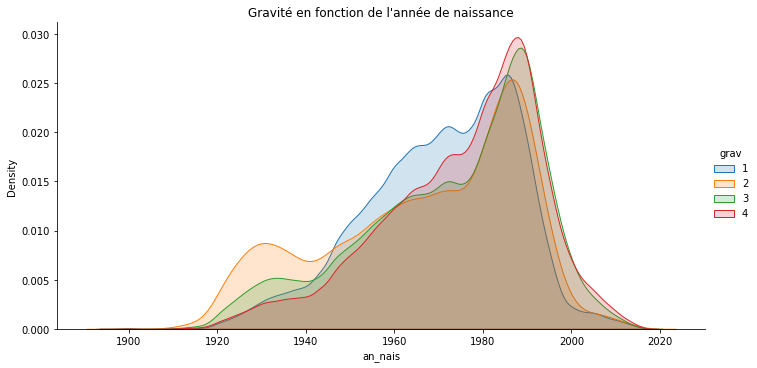

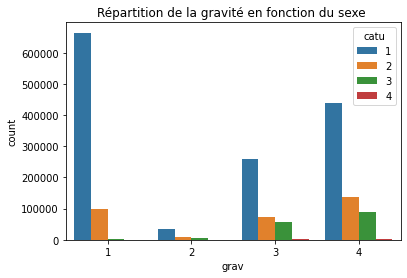

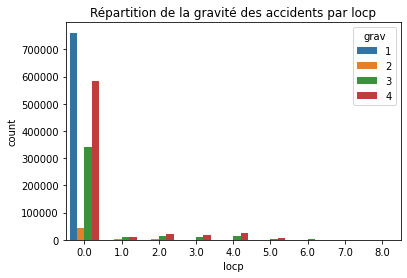

In [3]:
#----------------------------- Lecture des données des usagers --------------------------------------

df_users = df_users.reset_index()
print(df_users.shape)

plt.figure(figsize=(10,10))
numerical=['catu','grav','sexe','trajet','etatp','actp','locp','place']
df_users[numerical].hist(bins=10, figsize=(10, 10), layout=(2, 4))
plt.title("Histogramme des variables gravité ,sexe,trajet...")
plt.show()

#-------------- Quel trajet a plus accident ----------------------

trajet = df_users['trajet']
plt.figure(figsize=(10,10))
df_users['trajet'].value_counts().plot(kind='pie',autopct='%3.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Répartition des trajets les plus accidentés")
plt.show()

#--------------------- Quel place a le plus  accident ---------


plt.figure(figsize=(7,7))
df_users['place'].value_counts().plot(kind='pie',autopct='%4.1f%%')
plt.title("Répartition des places les plus accidentés...")
plt.show()

#---------------------- Gravité --------------


sns.countplot(df_users['grav'])
plt.title("Répartition de la gravité des accidents")
plt.show()


plt.figure(figsize=(10,10))
df_users['grav'].value_counts().plot(kind='pie',autopct='%3.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Répartition de la gravité des accidents")
plt.show()


#----------------------- Gravité en fonction de l'année de naissance -------------


g = sns.FacetGrid(df_users, hue="grav", aspect=2, height=5)
g.map(sns.kdeplot, "an_nais", alpha=.2, shade=True).add_legend()
plt.title("Gravité en fonction de l'année de naissance")
plt.show()

#----------------------- Répartition de la gravité en fonction du sexe -----------

ax = sns.countplot(x="grav", hue="catu", data=df_users)
plt.title("Répartition de la gravité en fonction du sexe ")
plt.show()

#---------------------- Répartition des accidents par la locp ---------------------

ax = sns.countplot(x="locp", hue="grav", data=df_users)
plt.title("Répartition de la gravité des accidents par locp")
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839187 non-null  float64
 6   nbv      838195 non-null  float64
 7   pr       414770 non-null  float64
 8   pr1      413463 non-null  float64
 9   vosp     838345 non-null  float64
 10  prof     838924 non-null  float64
 11  plan     838909 non-null  float64
 12  lartpc   830440 non-null  float64
 13  larrout  831706 non-null  float64
 14  surf     838968 non-null  float64
 15  infra    838707 non-null  float64
 16  situ     838983 non-null  float64
 17  env1     838709 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 115.4+ MB
None
            Num_Acc           catr     

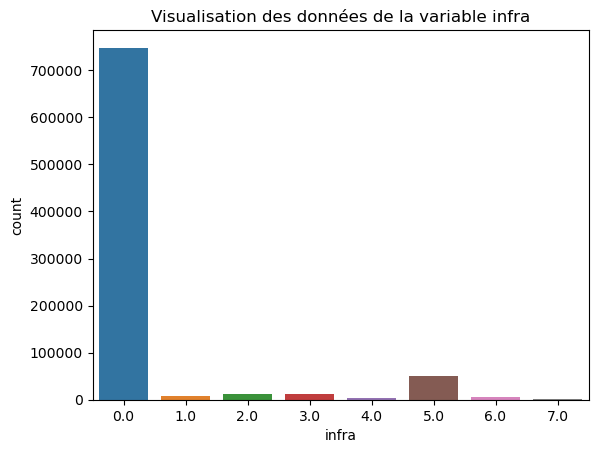

0.0    747965
5.0     50330
3.0     12853
2.0     11720
1.0      6994
6.0      5299
4.0      3034
7.0       512
Name: infra, dtype: int64
0.0      699686
15.0      30770
10.0      18085
20.0      15641
30.0       7863
          ...  
206.0         1
446.0         1
915.0         1
950.0         1
625.0         1
Name: lartpc, Length: 371, dtype: int64
0.0      258253
60.0      71196
70.0      57400
80.0      25940
50.0      23066
          ...  
665.0         1
985.0         1
916.0         1
909.0         1
363.0         1
Name: larrout, Length: 542, dtype: int64


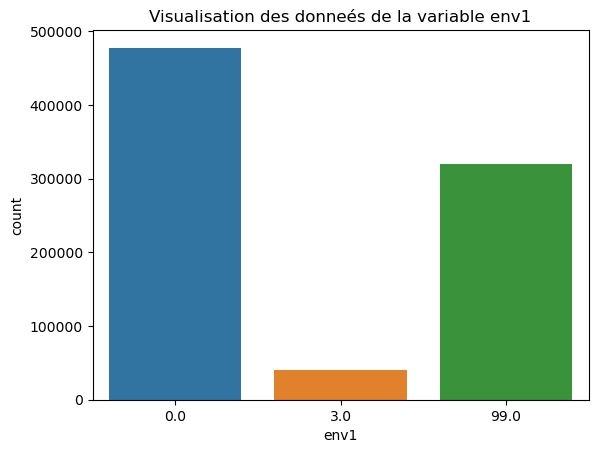

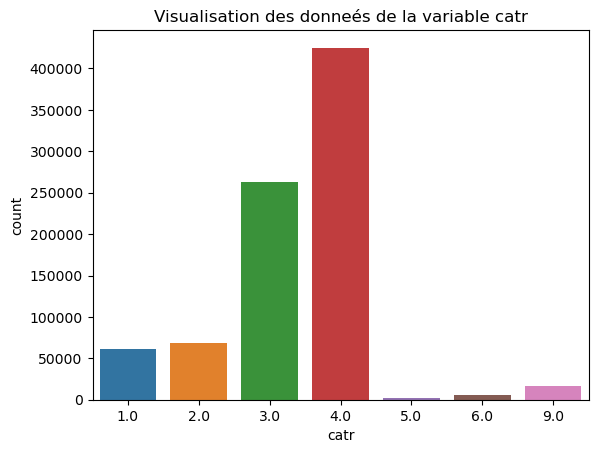

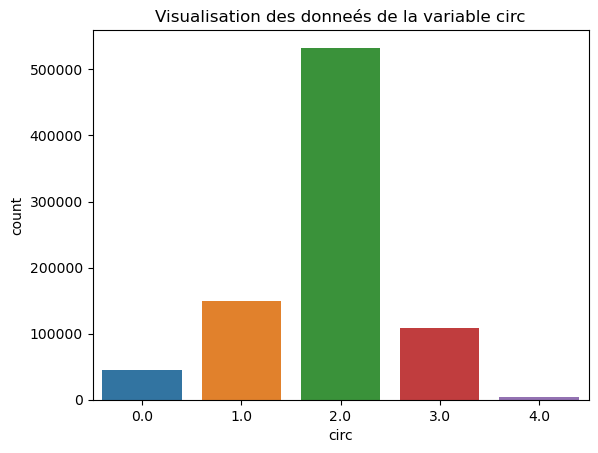

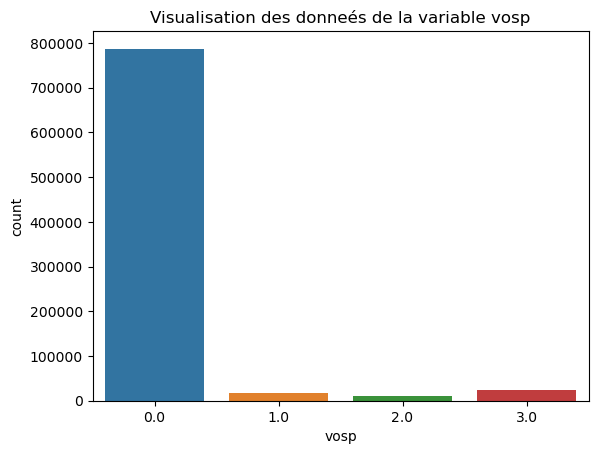

0.0    787021
3.0     23473
1.0     16570
2.0     11281
Name: vosp, dtype: int64


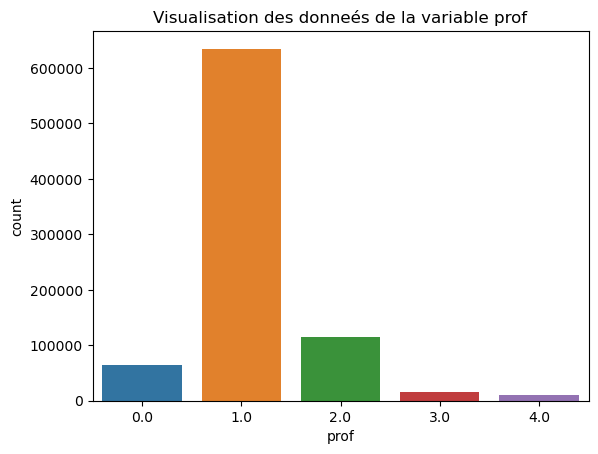

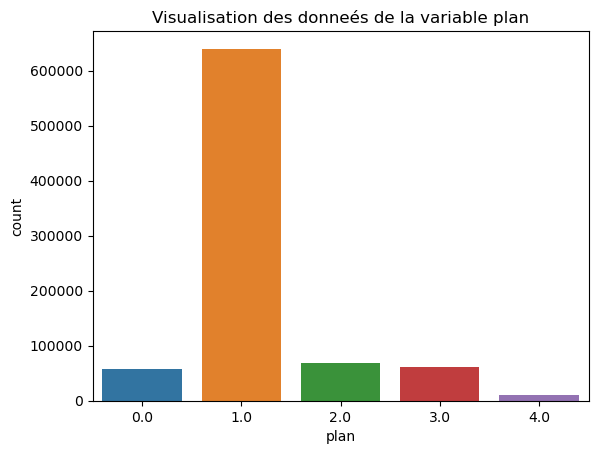

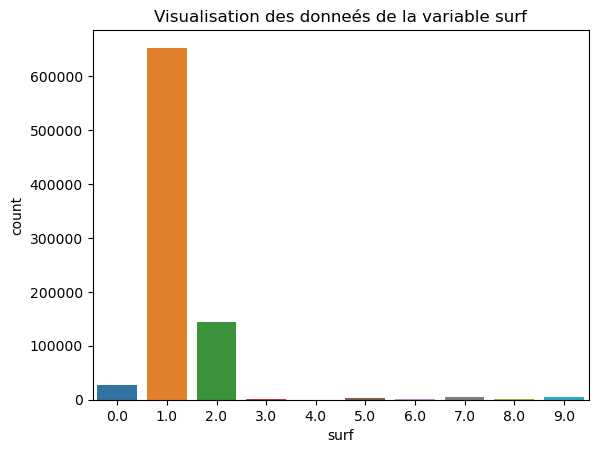

1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64


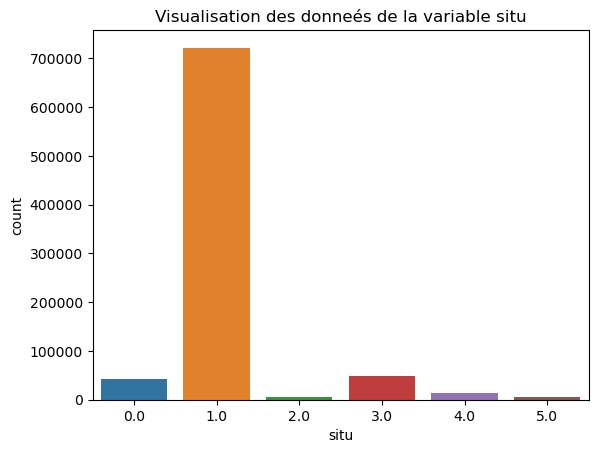

In [ ]:
#----------------------------- Lecture données Places --------------------------

print(df_places.info())                                                         # on regarde les différentes inforamtions du df Places
print(df_places.describe())                                                     # on regarde la distribution des variables
print(df_places.isna().sum())                                                   # on regarde le nombre de NaNs dans chaques variables

# On voit que les variables voie(numéro de la route), v1(index de l'itinéraire),v2(index de la route,pr(le numéro de la maison) et pr1 (la distance en metres par rapport au point de départ)

#----------------------------- Répartition des différentes valeurs dans la variable nbv (nombre de voies de circulation)
print(df_places['nbv'].value_counts(ascending=False))

# On voit qu'il y a peu de lignes pour des nombres de voies de circulation supérieur a 10

#----------------------------- Visualisation des données de la variable infra (types d'infrastructures routières)
sns.countplot(x=df_places['infra'])
plt.title("Visualisation des données de la variable infra")
plt.show()
print(df_places['infra'].value_counts(ascending=False))

# On voit que 747965 lignes sur 839985 (soit 89% du jeux de données) correspondent a une valeur O qui n'est pas dans l'explication du codage de cette variable

#----------------------------- Visualisation des donneés de la variable lartpc (Largeur du terre plein central (TPC) s'il y a)
print(df_places['lartpc'].value_counts(ascending=False))

# On voit qu'il y a 371 largeur de TPC possible

#----------------------------- Visualisation des donneés de la variable larrout (La largeur de la chaussée affectée à la circulation des véhicules )

print(df_places['larrout'].value_counts(ascending=False))

# On voit qu'il y a 542 largeur de la chaussée possible

#----------------------------- Visualisation des donneés de la variable env1 (distance d'une école)

sns.countplot(x=df_places['env1'])
plt.title("Visualisation des donneés de la variable env1")
plt.show()

# On voit qu'il y a 3 valeurs qui ne font pas sens (0, 3 et 99)

#----------------------------- Visualisation des donneés de la variable catr (Catégorie de route)

sns.countplot(x=df_places['catr'])
plt.title("Visualisation des donneés de la variable catr")
plt.show()

#----------------------------- Visualisation des donneés de la variable circ (Régime de circulation)

sns.countplot(x=df_places['circ'])
plt.title("Visualisation des donneés de la variable circ")
plt.show()

#----------------------------- Visualisation des donneés de la variable vosp (Existence d'une voie réservée)

sns.countplot(x=df_places['vosp'])
plt.title("Visualisation des donneés de la variable vosp")
plt.show()
print(df_places['vosp'].value_counts(ascending=False))

# On voit que 787021 lignes sur 839985 (soit 93% du jeux de données) correspondent a une absence de voie réservée

#----------------------------- Visualisation des donneés de la variable prof (Pente de la route sur le lieu de l'accident)

sns.countplot(x=df_places['prof'])
plt.title("Visualisation des donneés de la variable prof")
plt.show()

#----------------------------- Visualisation des donneés de la variable plan (Dessin en plan)

sns.countplot(x=df_places['plan'])
plt.title("Visualisation des donneés de la variable plan")
plt.show()

#----------------------------- Visualisation des donneés de la variable surf (Etat de surface)

sns.countplot(x=df_places['surf'])
plt.title("Visualisation des donneés de la variable surf")
plt.show()
print(df_places['surf'].value_counts(ascending=False))

#----------------------------- Visualisation des donneés de la variable situ (Situation de l'accident)

sns.countplot(x=df_places['situ'])
plt.title("Visualisation des donneés de la variable situ")
plt.show()



Le nb d'accident est globalement en constante diminution depuis 2005
Cependant les accidents hors agglomération sont en augmentation depuis 2012/2013
moins d accidents en aout et en agglo: effet vacances en Ile de France


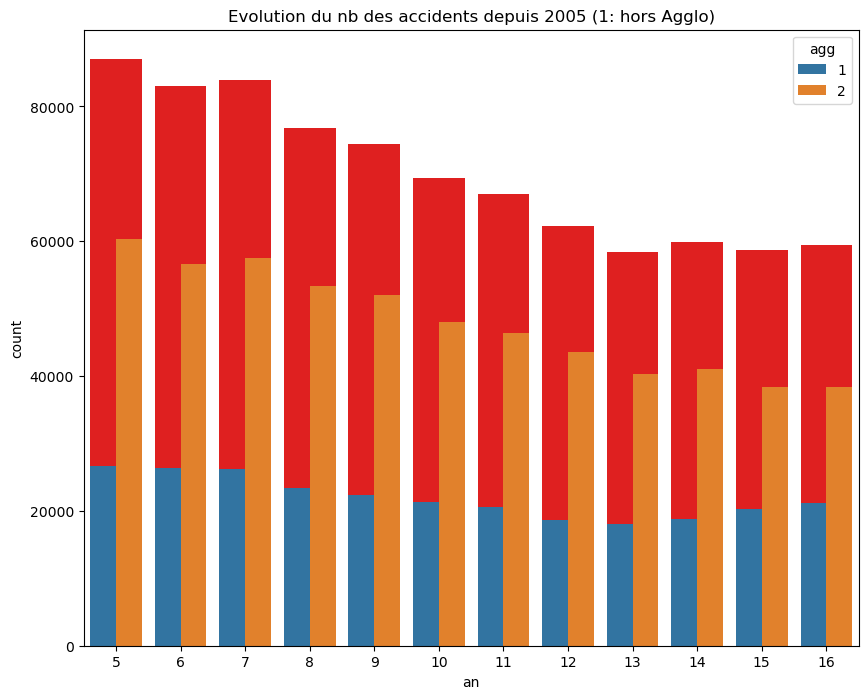

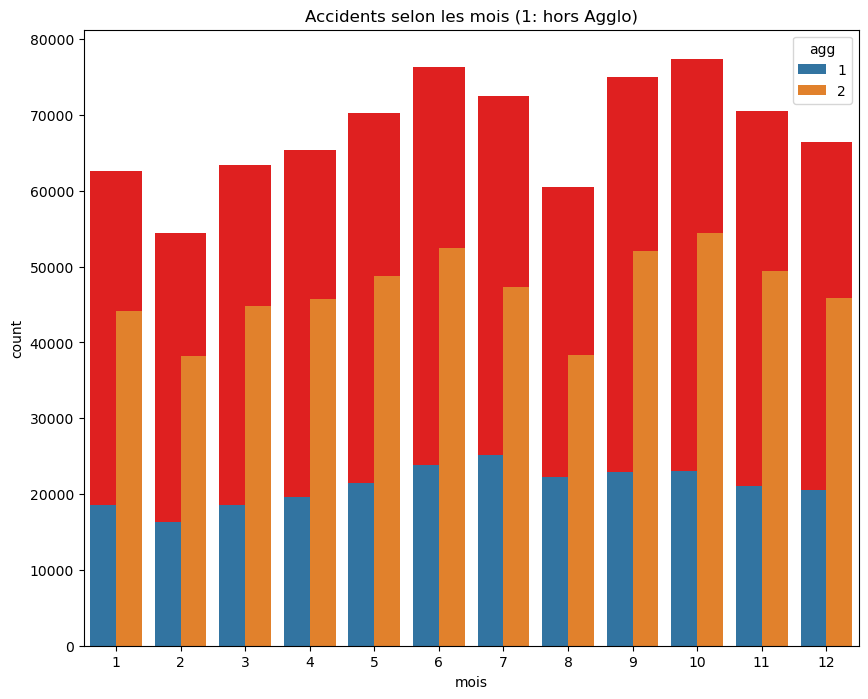

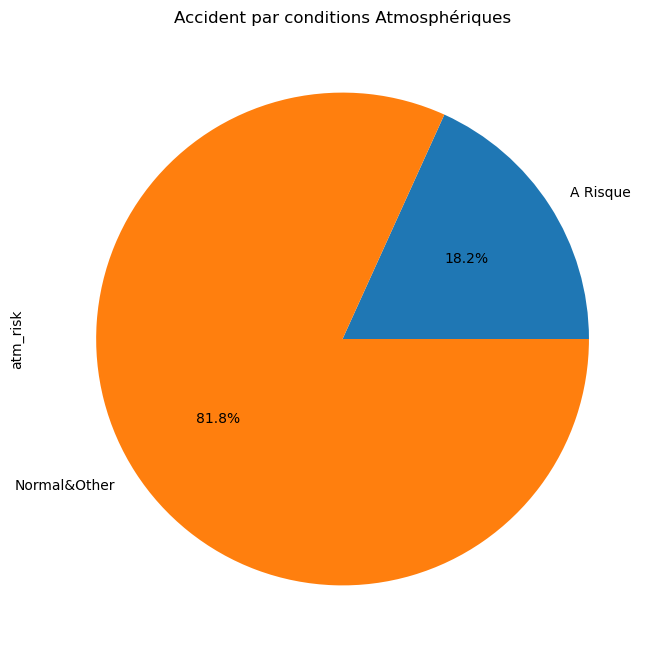

18% des accidents se produisent avec un temps dégradés


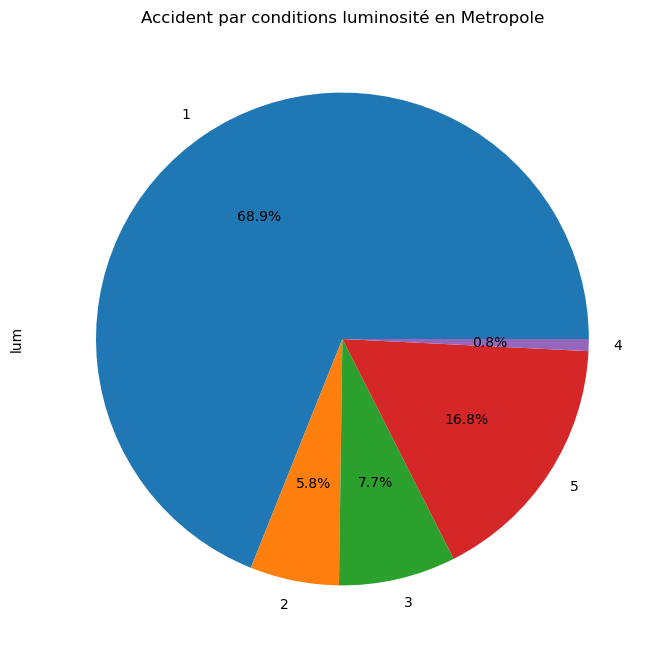

70 % des axccidents se passent en pleine journée
      counts
dep         
75.0   87482
13.0   52188
93.0   33810
92.0   31261
94.0   29389
6.0    28447
69.0   25684
59.0   23838
33.0   22454
91.0   17463
78.0   14797
31.0   14190
34.0   14008
95.0   13473
83.0   12961
44.0   11592
77.0   11512
67.0   11142
76.0   10989
62.0   10455
prop : counts    58.55962
dtype: float64


/var/folders/_1/yttpv42s1936z_r_f3zkvchc0000gn/T/ipykernel_7439/1527539841.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['dep'] = df_M['dep']/10


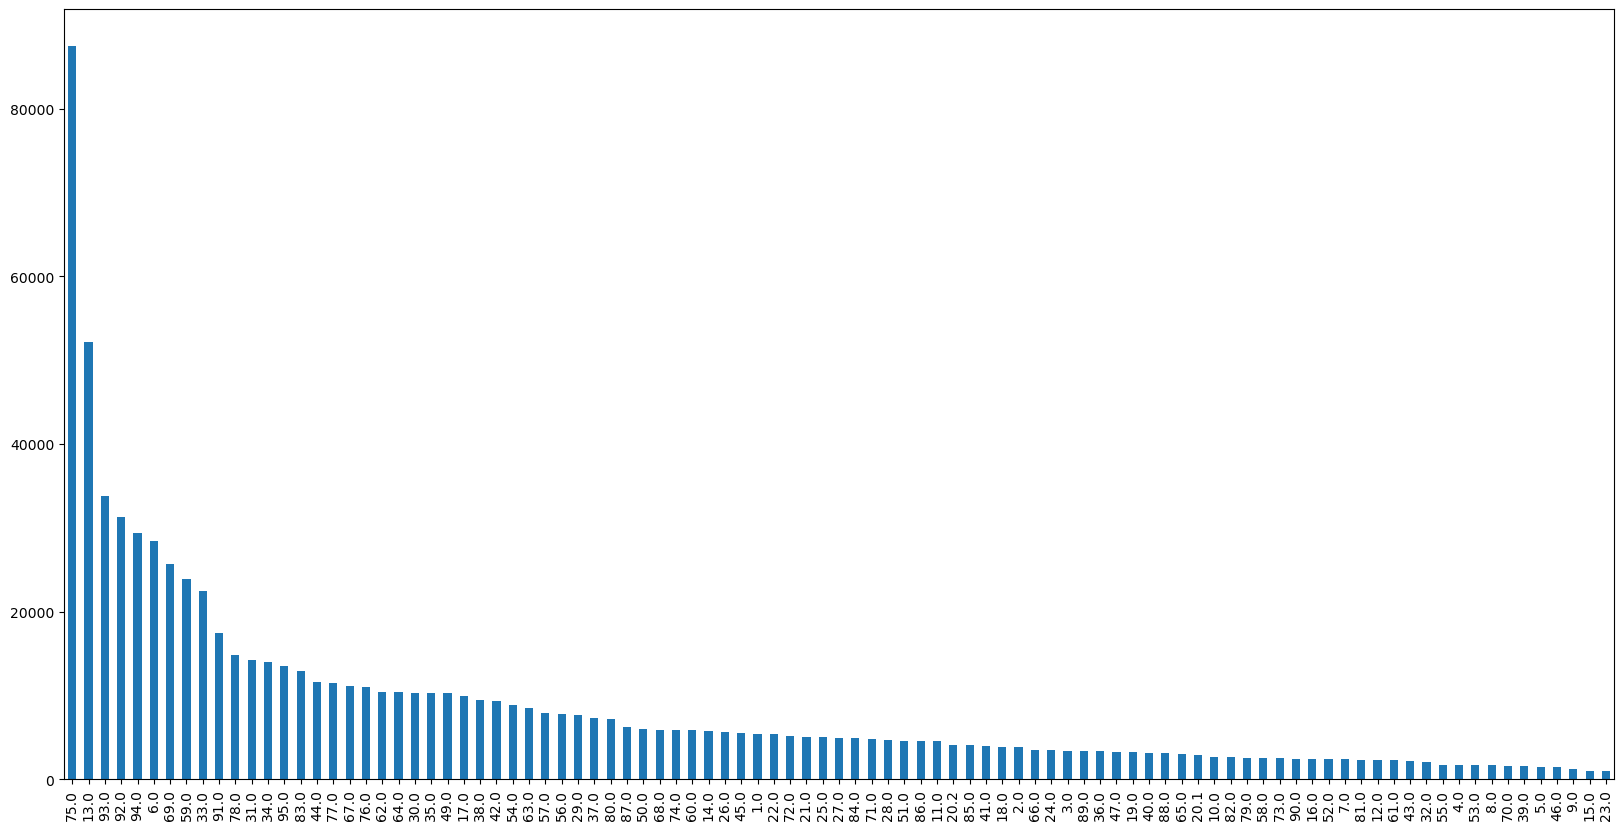

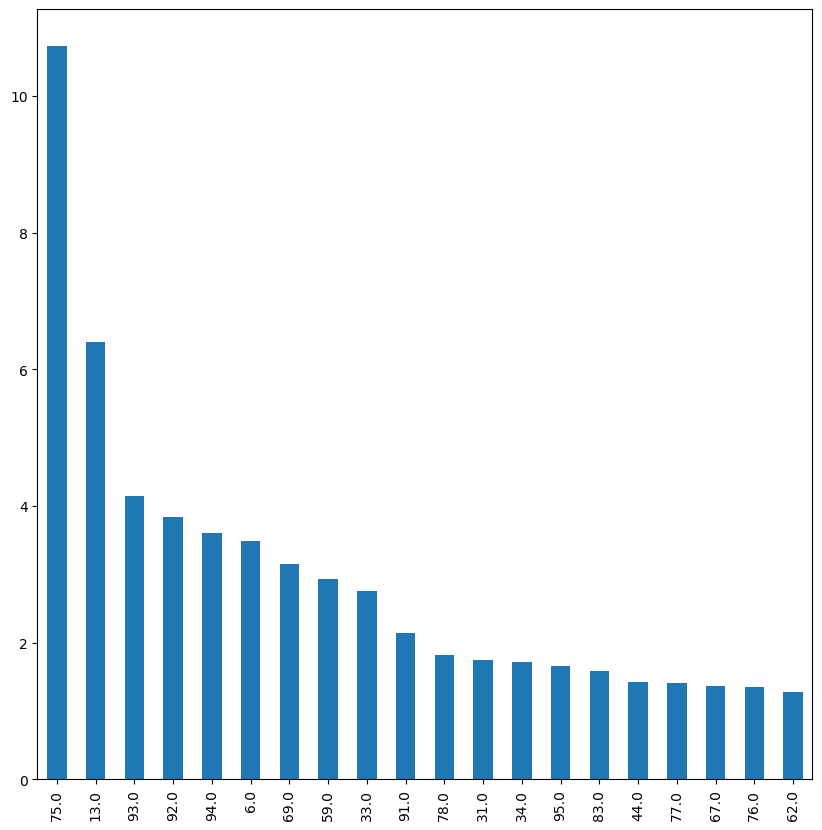

In [ ]:
#----------------------------- Lecture données caracteristics --------------------------

# Evolution dans le temps agglomeration et hors agglomeration
# Chargement du fichier caractéristics

# Suppression des variables non utiles (adresse trop peu utlisable et gps car corrigée avec gps_cor)

df = df_caract.drop(columns =['adr','gps'])
df


plt.figure(figsize = (10,8))
plt.title('Evolution du nb des accidents depuis 2005 (1: hors Agglo)')
sns.countplot(x='an', color = 'r', data = df);
sns.countplot(x='an', hue = 'agg', data = df);

print("Le nb d'accident est globalement en constante diminution depuis 2005")
print("Cependant les accidents hors agglomération sont en augmentation depuis 2012/2013")

# Distribution des accidents par mois en metropole
df_M = df[(df['dep'] > 0) & (df['dep'] <= 950)]


plt.figure(figsize = (10,8))
plt.title('Accidents selon les mois (1: hors Agglo)')
sns.countplot(x='mois', color = 'r', data = df_M);
sns.countplot(x='mois', hue = 'agg', data = df_M);
print('moins d accidents en aout et en agglo: effet vacances en Ile de France')

# Analyse sur la situation atmosphérique et les accidents
# Creation d'une colonne pour temps accidentogene (beau vs nuageux, pluvieux, neigeux etc)

df['atm_risk']= df['atm']

replace = df['atm_risk'].value_counts().index.tolist()
new_cat = ['Normal&Other', 'A Risque','A Risque','A Risque','A Risque','Normal&Other','A Risque','A Risque','A Risque']

df['atm_risk']= df['atm_risk'].replace(to_replace= replace, value = new_cat)

plt.figure(figsize = (10,8))
plt.title('Accident par conditions Atmosphériques')
df.atm_risk.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("18% des accidents se produisent avec un temps dégradés")

# Moment de la journée

plt.figure(figsize = (10,8))
plt.title('Accident par conditions luminosité en Metropole')
df_M.lum.value_counts(sort=False).plot.pie(autopct='%1.1f%%', normalize = True)
plt.show()
print("70 % des axccidents se passent en pleine journée")

# Distribution par departement

df_M['dep'] = df_M['dep']/10
top_dep = df_M['dep'].value_counts().head(20).rename_axis('dep').to_frame('counts')
print (top_dep)


top_dep_acc = top_dep.sum()
all_acc = df_M['dep'].count()
print('prop :', (top_dep_acc/all_acc)*100)

plt.figure(figsize = (20,10))
df_M['dep'].value_counts().head(95).plot(kind='bar');

# Contribution des 20 departements comptant le plus d'accident


plt.figure(figsize = (10,10))
proportion_dep = df_M['dep'].value_counts(normalize = True).head(20)*100
proportion_dep.plot(kind='bar');

/var/folders/_1/yttpv42s1936z_r_f3zkvchc0000gn/T/ipykernel_7439/2424784207.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['catv_2r']= df_new['catv'].replace(to_replace = [33,2,30,32,31,5], value = [0,0,0,0,0,0])


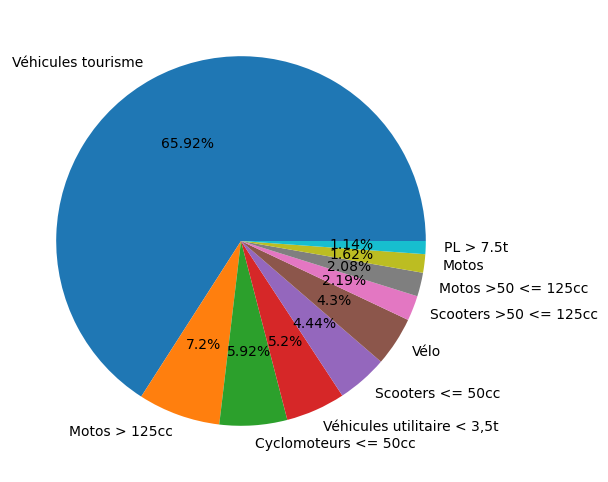

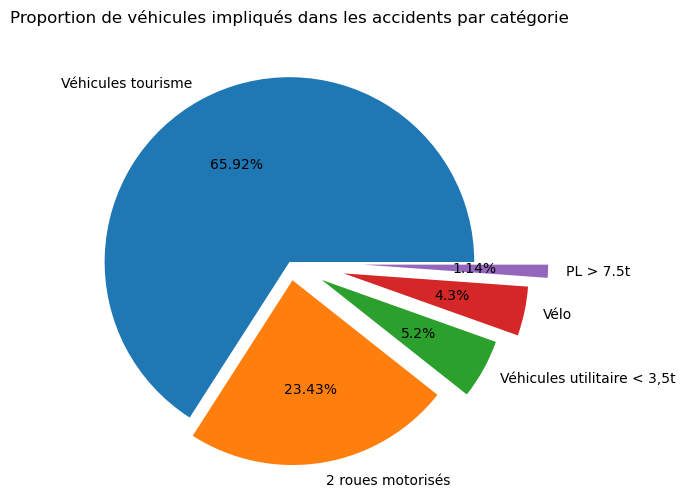

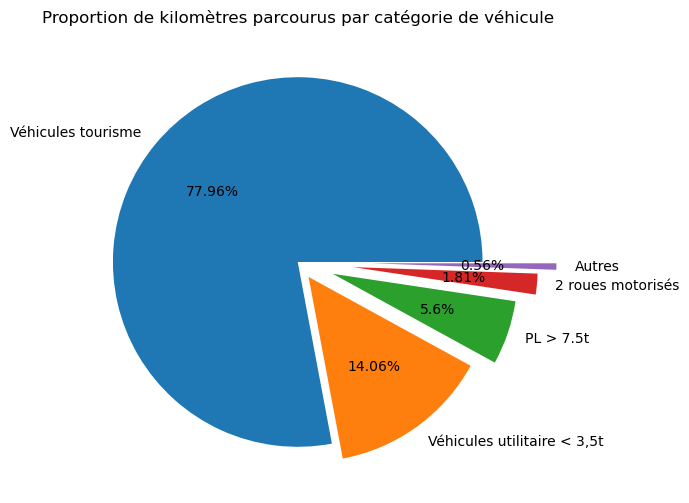

In [ ]:
#----------------------------- Lecture données Vehicules --------------------------
#Traitement des différentes catégorie de véhicules

df = pd.read_csv('vehicles.csv')
df_new=df[df.catv.isin([7,33,2,30,10,1,32,31,5,14])]
cat = df_new['catv'].value_counts(normalize=True) 

#Visualisation des différentes catégories

leg = ['Véhicules tourisme', 'Motos > 125cc', 'Cyclomoteurs <= 50cc', 'Véhicules utilitaire < 3,5t', 'Scooters <= 50cc', 'Vélo', 'Scooters >50 <= 125cc', 'Motos >50 <= 125cc', 'Motos', 'PL > 7.5t']
plt.figure(figsize=(6,6))
plt.pie(cat, labels=leg, autopct = lambda x: str(round(x,2)) + '%');


#Regroupement des 2 roues motorisés en une nouvelle catégories

df_new['catv_2r']= df_new['catv'].replace(to_replace = [33,2,30,32,31,5], value = [0,0,0,0,0,0])
df_new

cat_2r = df_new['catv_2r'].value_counts(normalize=True)
plt.figure(figsize=(6,6))

lab = ['Véhicules tourisme', '2 roues motorisés', 'Véhicules utilitaire < 3,5t', 'Vélo', 'PL > 7.5t']
plt.title("Proportion de véhicules impliqués dans les accidents par catégorie")
plt.pie(cat_2r, labels= lab, autopct = lambda x: str(round(x,2)) + '%', explode =[0,0.1,0.2,0.3,0.4],);


# Nombre de kilomètres parcourus par chaque catégorie de véhicules.
# Source https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-12/datalab_78_comptes_transports_2019_circulation_novembre2020.pdf
# Pour 623 M km-véhicule : Voiture= 485.7, Utilitaires légers= 87.6, PL= 34.9, Deux roues motorisés= 11.3

plt.figure(figsize=(6,6))
lab2 = ['Véhicules tourisme', 'Véhicules utilitaire < 3,5t','PL > 7.5t','2 roues motorisés', 'Autres']
plt.title("Proportion de kilomètres parcourus par catégorie de véhicule")
plt.pie([485.7,87.6,34.9,11.3,3.5], labels = lab2, autopct = lambda x: str(round(x,2)) + '%', explode =[0,0.1,0.2,0.3,0.4]);


# MERGE DES DONNEES

In [6]:
#Merge des données

df_projet_brut=pd.merge(df_users, df_veh, how='left', on=["Num_Acc", "num_veh"])
df_projet_brut=pd.merge(df_projet_brut, df_caract, how='left', on=["Num_Acc"])
df_projet_brut=pd.merge(df_projet_brut, df_places, how='left', on=["Num_Acc"])

In [7]:
df_projet_brut.isna().sum()

Num_Acc          0
place       100366
catu             0
grav             0
sexe             0
trajet         369
secu         43458
locp          1664
actp          1773
etatp         1706
an_nais       2351
num_veh          0
senc           111
catv            22
occutc          22
obs            812
obsm           699
choc           155
manv           256
an               0
mois             0
jour             0
hrmn             0
lum              0
agg              0
int              0
atm            116
col             24
com              6
adr         337269
gps        1035286
lat        1043744
long       1043754
dep              0
catr             2
voie        124484
v1         1127003
v2         1796703
circ          1781
nbv           4063
pr          914020
pr1         916812
vosp          3769
prof          2399
plan          2443
lartpc       21272
larrout      18297
surf          2310
infra         2899
situ          2278
env1          2914
dtype: int64

In [8]:
df_projet_brut.shape

(1876005, 51)

# DATAVIZ FICHIER MERGE

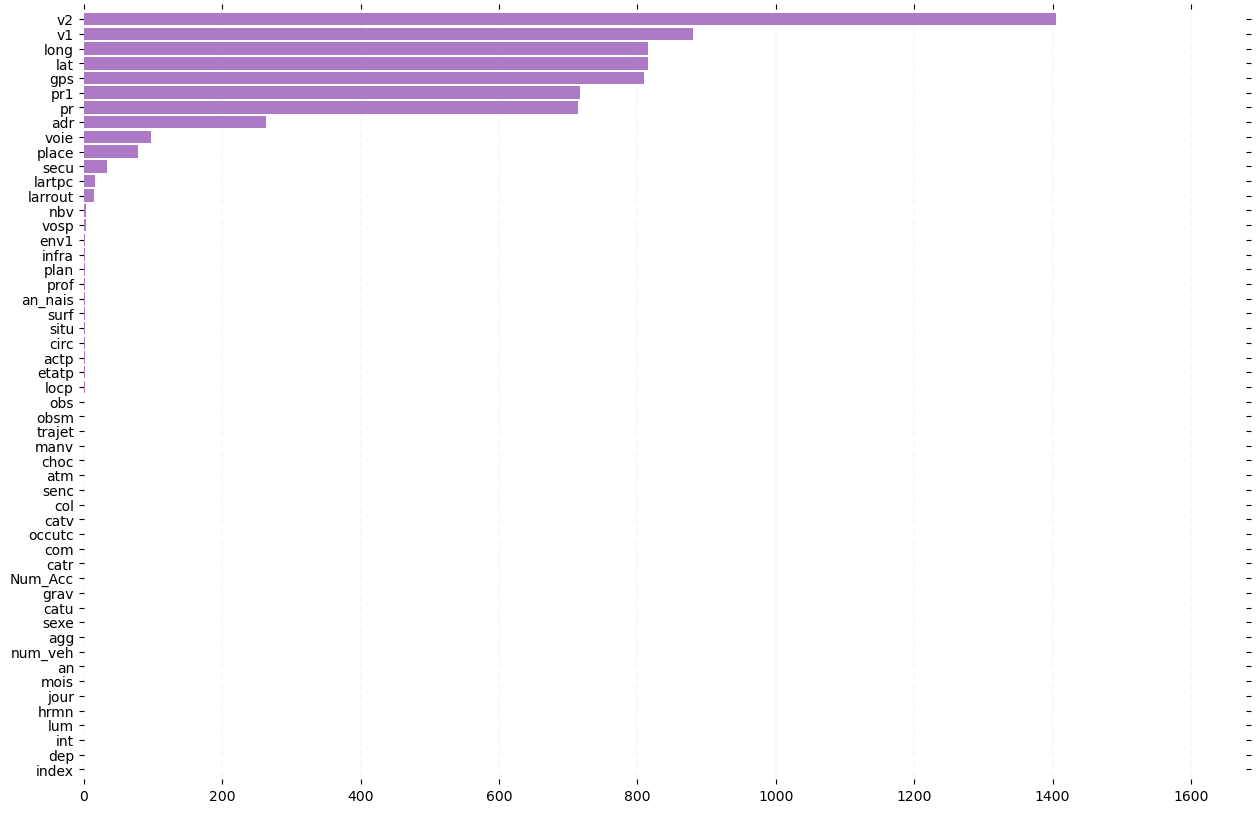

In [ ]:
nan_values = df_projet_brut.isna().sum()
nan_values = nan_values.sort_values(ascending=True)*100/127951
ax = nan_values.plot(kind='barh',
                     figsize=(15, 10),
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both",
               which="both",
               bottom="off",
               top="off",
               labelbottom="on",
               left="off",
               right="off",
               labelleft="on")
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#EEEEEE', zorder=1)

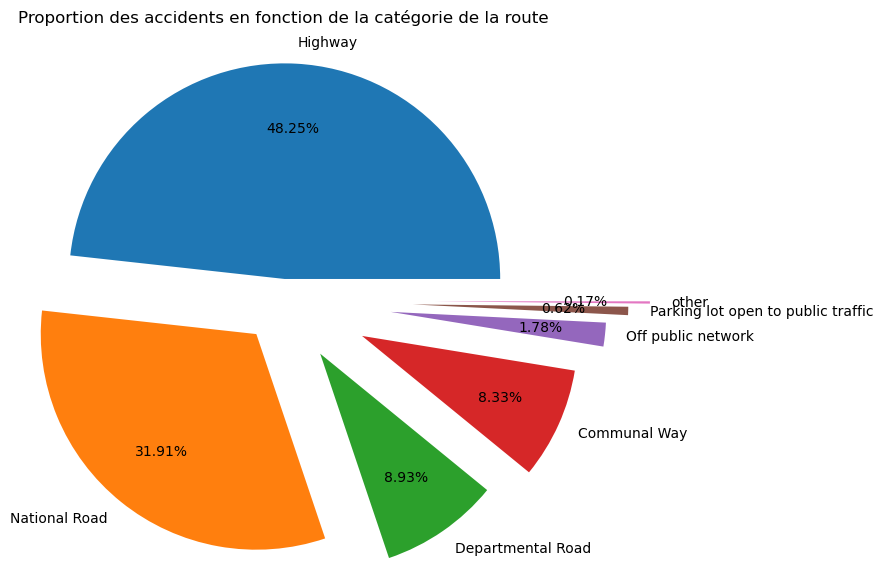

In [ ]:
plt.figure(figsize = (7, 7))

df = df_projet_brut['catr'].value_counts(normalize=True)
lab1 = ['Highway','National Road','Departmental Road','Communal Way','Off public network ','Parking lot open to public traffic','other']

plt.title("Proportion des accidents en fonction de la catégorie de la route")
plt.pie(df, labels = lab1,
        explode = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7,
           );

/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

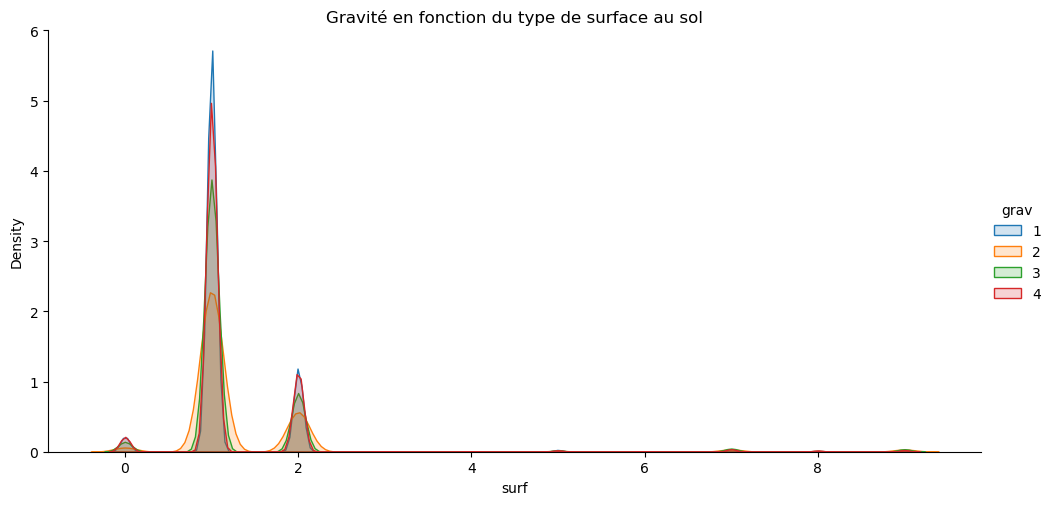

In [ ]:
g = sns.FacetGrid(df_projet_brut, hue="grav", aspect=2, height=5)
g.map(sns.kdeplot, "surf", alpha=.2, shade=True).add_legend()
plt.title("Gravité en fonction du type de surface au sol")
plt.show()

# PREPOCESSING & FEATURES SELECTION

In [9]:
#On nettoie le fichier df_projet_brut
#On supprime les variables gps, lat et long car il y a beaucoup de NaN et pas utile pour la gravité car variable de géolocalisation
#On supprime les variables voie, v1 et v2 car il y a beaucoup de NaN et pas utiles pour la gravité car des variables indiquant des numéros de rue comme la variable adr_car
#On supprime les variables pr et pr1 car beaucoup de NaN et pas utlies pour la gravité car des variables relative au lieu d'habitation.
#On supprime la variable infra car beaucoup de valeurs en 0 (valeurs non indiquées dans les définitions.
#On supprime la variable Num_Acc car ce n'est pas une variable explicative
#On supprume la variable com (Comummune) fortement correlée avec dep (departement) 
#On supprume la variable nbv car beaucoup de catégories (53) et les informations que nous avons besons sont dans circ(type de route avec nb de voie)
#On supprime la variable senc (sens de circulation) énormement d'inconnu a + de 90%
#On suppriume la varibale place (place dans le vehicule) car la variable catu donne deja le type de user a savoir, conducteur, passager
to_drop=['gps','lat','long','voie','v1','v2','adr','pr','pr1','infra','Num_Acc','com', 'nbv','senc','place']
df_projet_brut_2=df_projet_brut.drop(to_drop,axis=1)

In [10]:
# Retraitement Variables:

# catv (99 catégories) on retraire en: vehicule 2 roues, vehicule non carrossé (hors 2 roues), 
# vehicule leger carrosé, vehicule leger carrosé avec attelage (remorque, caravanne), poids lourd et transport en commun.
# 2 Roues,1,Commun,3,Inconnu,0,Poids Lourds,4,VL Attelage,5,VL Carrose,2,VL Non Carrose,6,

#catv
catv_value = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,60,80,99]
catv_value_new = [0,1,1,2,1,1,6,2,5,5,5,5,5,4,4,4,4,4,3,3,4,4,1,1,1,1,1,6,6,3,3,3,3,1,1,1,1,1,0,0]
df_projet_brut_2['catv'].replace(catv_value, catv_value_new, inplace = True)


# plan = type de voie (rectiligne ou type de courbes), je propose de faire 0 rectiligne 1 courbe

#plan
plan_value = [1,2,3,4]
plan_value_new = [0,1,1,1]
df_projet_brut_2['plan'].replace(plan_value, plan_value_new, inplace = True)

# Retraitement secu. Le code secu appliqué dans les données de Kaggle a peu de sens
# On crée danc une nlle va secu indiquant si existance d'un materiel de securité et utilisé (casque, ceinture de secu, etc)

# Valeurs actuelles
secu_value = df_projet_brut_2['secu'].value_counts().index.tolist()

# Nlle valeur indique si utilisation d'un element de scurité (0) sinon (1) (1 integre la non connaissance et nan)
secu_new = [0, 0, 1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1]

#Nlle colonne new_secu

df_projet_brut_2['New_secu'] = df_projet_brut_2['secu']

df_projet_brut_2['New_secu'].replace(secu_value, secu_new, inplace = True)
df_projet_brut_2 = df_projet_brut_2.drop('secu', axis = 1)

#Grav
df_projet_brut_2['grav'].replace([1, 2, 3,4],[0, 1, 1, 0], inplace=True)

df_projet_brut_2.isna().sum()

catu            0
grav            0
sexe            0
trajet        369
locp         1664
actp         1773
etatp        1706
an_nais      2351
num_veh         0
catv           22
occutc         22
obs           812
obsm          699
choc          155
manv          256
an              0
mois            0
jour            0
hrmn            0
lum             0
agg             0
int             0
atm           116
col            24
dep             0
catr            2
circ         1781
vosp         3769
prof         2399
plan         2443
lartpc      21272
larrout     18297
surf         2310
situ         2278
env1         2914
New_secu    43458
dtype: int64

In [11]:
df_projet_brut_2.shape

(1876005, 36)

In [12]:
# Travail sur les valeurs de la variable num_veh

num_veh = df_projet_brut['num_veh'].value_counts(normalize = True)*100
print(num_veh.head(10))
print("en dessous de la 5eme valeur on descend à une contribution de moins de 1%")

A01    60.892322
B01    24.774294
B02     9.239901
C01     2.604950
C03     1.027663
D01     0.508794
Z01     0.343869
D04     0.213699
E01     0.122228
E05     0.060661
Name: num_veh, dtype: float64
en dessous de la 5eme valeur on descend à une contribution de moins de 1%


In [13]:
X_num=df_projet_brut_2.select_dtypes(include=['float64','int64'])
X_cat=df_projet_brut_2.select_dtypes('object')
X_cat=pd.get_dummies(X_cat)
df_projet_brut_3=pd.concat([X_num,X_cat], axis=1)

In [14]:
num_veh_to_drop = num_veh.tail(124).index
append_str = 'num_veh_'
num_veh_to_drop = [append_str + sub for sub in num_veh_to_drop]
df_projet_brut_3 = df_projet_brut_3.drop(num_veh_to_drop, axis = 1)

In [15]:
df_projet_brut_3.isna().sum()

catu               0
grav               0
sexe               0
trajet           369
locp            1664
actp            1773
etatp           1706
an_nais         2351
catv              22
occutc            22
obs              812
obsm             699
choc             155
manv             256
an                 0
mois               0
jour               0
hrmn               0
lum                0
agg                0
int                0
atm              116
col               24
dep                0
catr               2
circ            1781
vosp            3769
prof            2399
plan            2443
lartpc         21272
larrout        18297
surf            2310
situ            2278
env1            2914
New_secu       43458
num_veh_A01        0
num_veh_B01        0
num_veh_B02        0
num_veh_C01        0
num_veh_C03        0
dtype: int64

In [16]:
df_projet_brut_3.shape

(1876005, 40)

In [17]:
df_projet_brut_3 = df_projet_brut_3.dropna(axis = 1, how='all')
df_projet_brut_3 = df_projet_brut_3.dropna(axis = 0, how='any')

In [18]:
df_projet_brut_3.isna().sum()

catu           0
grav           0
sexe           0
trajet         0
locp           0
actp           0
etatp          0
an_nais        0
catv           0
occutc         0
obs            0
obsm           0
choc           0
manv           0
an             0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm            0
col            0
dep            0
catr           0
circ           0
vosp           0
prof           0
plan           0
lartpc         0
larrout        0
surf           0
situ           0
env1           0
New_secu       0
num_veh_A01    0
num_veh_B01    0
num_veh_B02    0
num_veh_C01    0
num_veh_C03    0
dtype: int64

In [19]:
df_projet_brut_3.shape

(1807155, 40)

In [20]:
target=df_projet_brut_3['grav']
feats=df_projet_brut_3.drop(['grav'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [21]:
select = SelectKBest(f_classif, k= 20)

# ici l'idée n'est pas de faire un train et test mais de capturer les features les plus contingentes à la target
# Donc on prends le dataset complet avec la target dualisée (Grave vs Pas grave)

select.fit_transform(feats, target)

feats_KBest = feats.columns[select.get_support()]
print("les 20 va les plus explicatives selectionnées sont:", feats.columns[select.get_support()])

les 20 va les plus explicatives selectionnées sont: Index(['catu', 'locp', 'actp', 'etatp', 'catv', 'obs', 'obsm', 'agg', 'int',
       'atm', 'col', 'dep', 'catr', 'plan', 'situ', 'New_secu', 'num_veh_A01',
       'num_veh_B01', 'num_veh_B02', 'num_veh_C01'],
      dtype='object')


In [22]:
# Selection des best features selon SelectFromModel

selector_mean = SelectFromModel(SGDClassifier(random_state = 0), threshold = 'mean')

selector_mean.fit_transform(feats, target)

feats_sgdc_mean = feats.columns[selector_mean.get_support()]
print("les va les plus explicatives selectionnées sont:", feats.columns[selector_mean.get_support()])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


les va les plus explicatives selectionnées sont: Index(['catu', 'sexe', 'etatp', 'catv', 'agg', 'plan', 'situ', 'New_secu',
       'num_veh_A01', 'num_veh_B02', 'num_veh_C01'],
      dtype='object')


In [23]:
# Selection des best features par la mediane pour des va catégorielles

selector_median = SelectFromModel(SGDClassifier(random_state = 0), threshold = 'median')

selector_median.fit_transform(feats, target)

feats_sgdc_med = feats.columns[selector_median.get_support()]
print("les va les plus explicatives selectionnées par mediane sont:", feats.columns[selector_median.get_support()])



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


les va les plus explicatives selectionnées par mediane sont: Index(['catu', 'sexe', 'locp', 'actp', 'etatp', 'catv', 'obs', 'obsm', 'agg',
       'col', 'circ', 'vosp', 'plan', 'situ', 'New_secu', 'num_veh_A01',
       'num_veh_B01', 'num_veh_B02', 'num_veh_C01', 'num_veh_C03'],
      dtype='object')


In [24]:
# Utilisation d'un modele de Gradient Boosting (particulièrement adapté aux va cat par tree decision) avec New_secu

#n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0
gb_clf = SelectFromModel(GradientBoostingClassifier())
gb_clf.fit_transform(feats, target)

feats_gbc = feats.columns[gb_clf.get_support()]
print("les va les plus explicatives selectionnées par GBC sont:", feats.columns[gb_clf.get_support()])

les va les plus explicatives selectionnées par GBC sont: Index(['catu', 'catv', 'obs', 'agg', 'col', 'dep', 'catr', 'num_veh_B02'], dtype='object')


In [25]:
# Feature Selection : On crée un DF ne contenant que les features selectionnées precedemment

keep_feats0 = feats_KBest.append(feats_sgdc_mean)
keep_feats1 = keep_feats0.append(feats_sgdc_med)
keep_feats = keep_feats1.append(feats_gbc)

keep_feats = Counter(keep_feats).keys()

print(keep_feats)

feats_select = feats[keep_feats]

dict_keys(['catu', 'locp', 'actp', 'etatp', 'catv', 'obs', 'obsm', 'agg', 'int', 'atm', 'col', 'dep', 'catr', 'plan', 'situ', 'New_secu', 'num_veh_A01', 'num_veh_B01', 'num_veh_B02', 'num_veh_C01', 'sexe', 'circ', 'vosp', 'num_veh_C03'])


In [26]:
feats_select.isna().sum()

catu           0
locp           0
actp           0
etatp          0
catv           0
obs            0
obsm           0
agg            0
int            0
atm            0
col            0
dep            0
catr           0
plan           0
situ           0
New_secu       0
num_veh_A01    0
num_veh_B01    0
num_veh_B02    0
num_veh_C01    0
sexe           0
circ           0
vosp           0
num_veh_C03    0
dtype: int64

In [27]:
feats_select.shape

(1807155, 24)

In [28]:
# Création des jeux d'entrainement et de test

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(feats_select, target, test_size=0.20, random_state=1234)



# LOGISTIC REGRESSION

In [ ]:
lr_select = LogisticRegression()
lr_select.fit(X_train_select, y_train_select)

# Visualisation des faux positifs et negatifs

y_pred_lr = lr_select.predict(X_test_select)

print(pd.crosstab(y_test_select, y_pred_lr, rownames=['Classe réelle'], colnames=['Classe prédite']))


Classe prédite       0     1
Classe réelle               
0               269159  8389
1                75206  8677


/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Classification report pour avoir les differents scores

print(classification_report(y_test_select, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87    277548
           1       0.51      0.10      0.17     83883

    accuracy                           0.77    361431
   macro avg       0.65      0.54      0.52    361431
weighted avg       0.72      0.77      0.70    361431



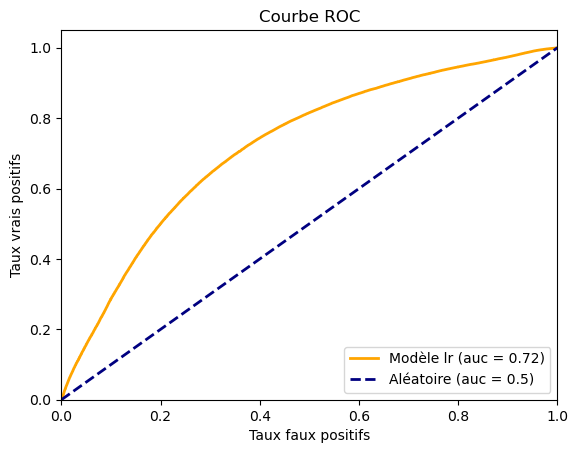

In [ ]:
# Courbe ROC

probs_select = lr_select.predict_proba(X_test_select)

# y_preds_select = np.where(probs_select[:,1]>0.7,1,0)

fpr, tpr, seuils = roc_curve(y_test_select, probs_select[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

# affichage courbe ROC sur modele avec selection features

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle lr (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();

In [ ]:
print("le modele de RegLog avec features selectionnées et retraitement de la variable secu nous donne un score globale de 0.75 au lieu de 0.65 avant traitement")
print("Cette amélioration reste insuffisante si l'on souhaite prédire les niveaux de gravité (1,2,3,4)")

le modele de RegLog avec features selectionnées et retraitement de la variable secu nous donne un score globale de 0.75 au lieu de 0.65 avant traitement
Cette amélioration reste insuffisante si l'on souhaite prédire les niveaux de gravité (1,2,3,4)


# RANDOM FOREST, OPTIMISATION DES HYPERPARAMETRES, UNDERSAMPLING et OVERSAMPLING

In [ ]:
# RF avec paramètres par defaut
cRF = RandomForestClassifier(n_jobs=-1, random_state=1234 )
cRF.fit(X_train_select, y_train_select)

# Visualisation des faux positifs et negatifs

y_pred_cRF = cRF.predict(X_test_select)

print(pd.crosstab(y_test_select, y_pred_cRF, rownames=['CLasse réelle'], colnames=['Classe prédite']))


Classe prédite       0      1
CLasse réelle                
0               255384  22164
1                43721  40162


In [ ]:
# Classification report pour avoir les differents scores

print(classification_report(y_test_select, y_pred_cRF))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89    277548
           1       0.64      0.48      0.55     83883

    accuracy                           0.82    361431
   macro avg       0.75      0.70      0.72    361431
weighted avg       0.81      0.82      0.81    361431



In [ ]:
# Tuning des hyper parametres d'un Random Forest avec GridSearchCV ici les hyperparametres testés mais iterativement
# faute de RAM

# param_grid_rf = {'n_estimators' : [50, 100, 200, 400, 800, 1000]
#                 'criterion': ['gini', 'entropy','log_loss']
#              'max_features' : [1, 0.5, 0.2]}

# Parametres Selectionnés:

cRF2 = RandomForestClassifier(n_jobs=-1, random_state = 1234)  

param_grid_rf = {'n_estimators' : [300],# limite / RAM
                 'criterion': ['log_loss'],
               'max_features' : [0.5]
                 ,}

CV_rf = GridSearchCV(estimator= cRF2, param_grid=param_grid_rf)  
CV_rf.fit(X_train_select, y_train_select)

# Visualisation des faux positifs et negatifs

y_pred_cRF2 = CV_rf.predict(X_test_select)

print(pd.crosstab(y_test_select, y_pred_cRF2, rownames=['CLasse réelle'], colnames=['Classe prédite']))



/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 436, in _process_worker
    r = call_item()
  File "/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/fabricebazinimac/opt/anaconda3

KeyError: 'log_loss'

In [ ]:
# Classification report pour avoir les differents scores

print(classification_report(y_test_select, y_pred_cRF2))

In [ ]:
print("Non grave représente 77% des accidents:") 
print(target.value_counts(normalize=True))
print(target.value_counts())

#----------------------------------------------------------------------------------------------#
# Quatre  approches de suréchantillonnage et de sous-échantillonnage pour la classification déséquilibrée ont été testés
# On concerve ici la meilleur

#------------------------------ SMOTE Over Sampling ------------------------------------------#
#La méthodologie SMOTE (Synthetic Minority Oversampling Technique),technique de suréchantillonnage de minorités synthétiques a été retenue car présentant score sur l'échantillon train le plus élevé.

print("SMOTE OVER SAMPLING : Suréchantillonnage synthétique de minorités ")       # Suréchantillonnage de minorités synthétiques
smote = SMOTE(random_state=42)                        
X_train_smote, y_train_smote= smote.fit_resample(X_train_select, y_train_select)
print(sorted(Counter(y_train_smote).items()))                                     # Vérification de la taille de l'échantillon après le reéquilibrage des données

rf_sm = RandomForestClassifier(n_jobs=-1, random_state=1234)
smote_model = rf_sm.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test_select)

# Visualisation des faux positifs et negatifs

print(pd.crosstab(y_test_select, smote_prediction, rownames=['CLasse réelle'], colnames=['Classe prédite']))

Non grave représente 77% des accidents:
0    0.768323
1    0.231677
Name: grav, dtype: float64
0    1388479
1     418676
Name: grav, dtype: int64
Classes échantillon undersampled : {0: 334793, 1: 334793}
Random Classifier avec rééquilibrage des données
Classe prédite       0      1
CLasse réelle                
0               206620  70928
1                18041  65842


In [ ]:
print(classification_report(y_test_select, smote_prediction))                    # Vérification de la performance du modèle


              precision    recall  f1-score   support

           0       0.86      0.91      0.88    277548
           1       0.62      0.50      0.55     83883

    accuracy                           0.81    361431
   macro avg       0.74      0.70      0.72    361431
weighted avg       0.80      0.81      0.81    361431



# XGBoost

In [29]:
#Ce code a mis 161 min à calculer

#Détermination des meilleurs paramètres pour XGboost

# PARAMETERS = {"subsample":[0.5, 0.75, 1],"colsample_bytree":[0.5, 0.75, 1],
#             "max_depth":[2, 6, 12], "learning_rate":[0.3, 0.1, 0.03], "n_estimators":[100]}


# model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
# model_gs.fit(X_train,y_train)

# print(model_gs.best_params_)

In [30]:
#Entrainement et prédiction avec les paramètres optimaux déterminés précédemment

xg_reg = xgb.XGBClassifier(colsample_bytree= 0.5,
                        learning_rate= 0.1,
                        max_depth= 12,
                        n_estimators= 100,
                        subsample= 1)

In [32]:
# Entrainement du modèle et prédiction
xg_reg.fit(X_train_select,y_train_select)

pred_values = xg_reg.predict(X_test_select)

In [33]:
#Affichage du Classification Report

print(metrics.classification_report(y_test_select, pred_values))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89    277548
           1       0.68      0.45      0.54     83883

    accuracy                           0.82    361431
   macro avg       0.77      0.69      0.72    361431
weighted avg       0.81      0.82      0.81    361431



In [34]:
#Affichage de la Crosstab
pd.crosstab(y_test_select, pred_values, rownames=['CLasse réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
CLasse réelle,,
0,260356,17192
1,46527,37356


In [35]:
#Calcul du Root Mean Square Error

rmse = np.sqrt(mean_squared_error(y_test_select, pred_values))
print("RMSE: %f" % (rmse))

RMSE: 0.419877


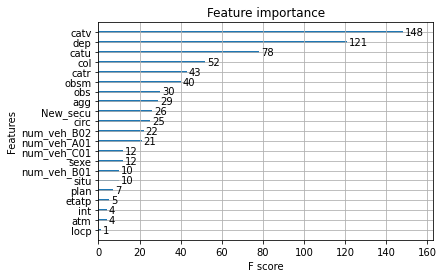

In [40]:
xgb_classif = xgb.XGBClassifier()
xgb_classif = xgb_classif.fit(X_train_select, y_train_select)

plot_importance(xgb_classif)
pyplot.show()

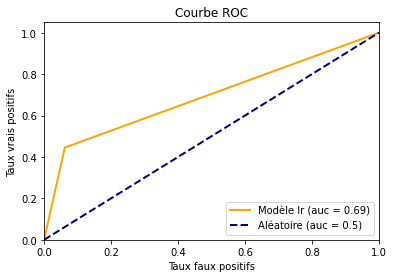

In [41]:
# Courbe ROC

fpr, tpr, seuils = roc_curve(y_test_select, pred_values)
roc_auc = auc(fpr, tpr)

# affichage courbe ROC sur modele avec selection features

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle lr (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show();

# Gravité en fonction de la Luminosité

In [ ]:
to_drop=['catu','sexe','trajet','locp','actp','etatp','an_nais','catv','occutc','obs','obsm','choc','manv','an','mois','jour','hrmn','int','col','dep','catr','circ','vosp','prof','plan',
         'lartpc','larrout','surf','situ','env1','New_secu','num_veh_A01','num_veh_B01','num_veh_B02','num_veh_C01','num_veh_C03']

df_lum=df_projet_brut_3.drop(to_drop,axis=1)

df_lum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807155 entries, 0 to 1876004
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   grav    int64  
 1   lum     int64  
 2   agg     int64  
 3   atm     float64
dtypes: float64(1), int64(3)
memory usage: 68.9 MB


In [ ]:
# On change le type de la variable atm en INTEGER

df_lum = df_lum.astype({'atm': int}) 

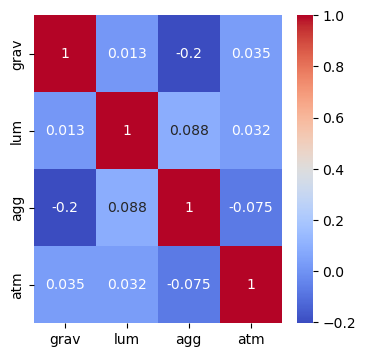

In [ ]:
# Heatmap pour regarder la corrélation des variables entre elle
cor = df_lum.corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

In [ ]:
df_lum_XG2 = df_lum                                                             # On crée un nouveau datafram pour le test XGBoost

In [ ]:
features_XG2 = df_lum_XG2.drop('grav', axis=1)                                  # On met les variables explicatives dans un df
target_XG2 = df_lum_XG2['grav']                                                 # On met la variable à prédire dans un df
features_matrix_XG2 = pd.get_dummies(features_XG2)                              # On cré une matrice où toutes les variables sont explicatives sont dichotomisées

In [ ]:
X_XG2, X_valid_XG2, y_XG2, y_valid_XG2 = train_test_split(features_matrix_XG2,target_XG2,test_size=0.2)           # On crée un ensemble de validation
X_train_XG2, X_test_XG2, y_train_XG2, y_test_XG2 = train_test_split(X_XG2, y_XG2, test_size=0.2, random_state=1234)                             # On crée un ensemble d'entrainement et un autre de test

In [ ]:
train_XG2 = xgb.DMatrix(data=X_train_XG2, label=y_train_XG2)                    # On crée des objets xgb.DMatrix contenant la matrice des variables et le vecteur des prédictions
test_XG2 = xgb.DMatrix(data=X_test_XG2, label=y_test_XG2)
valid_XG2 = xgb.DMatrix(data=X_valid_XG2, label=y_valid_XG2)

In [ ]:
params_XG2 = {'booster': 'gbtree', 'learning_rate': 0.01, 'objective':'binary:logistic'}                          # On crée un dictionnaire contenant les paramètes par défaut
xgb2 = xgb.train(params=params_XG2, dtrain=train_XG2, num_boost_round=700, evals=[(train_XG2, 'train_XG2'), (test_XG2, 'eval_XG2')])              # On entraine le modèle sur le jeu d'entrainement avec les paramêtres params

[0]	train_XG2-logloss:0.68994	eval_XG2-logloss:0.68994
[1]	train_XG2-logloss:0.68679	eval_XG2-logloss:0.68679
[2]	train_XG2-logloss:0.68371	eval_XG2-logloss:0.68370
[3]	train_XG2-logloss:0.68068	eval_XG2-logloss:0.68068
[4]	train_XG2-logloss:0.67772	eval_XG2-logloss:0.67771
[5]	train_XG2-logloss:0.67481	eval_XG2-logloss:0.67481
[6]	train_XG2-logloss:0.67196	eval_XG2-logloss:0.67196
[7]	train_XG2-logloss:0.66917	eval_XG2-logloss:0.66916
[8]	train_XG2-logloss:0.66643	eval_XG2-logloss:0.66642
[9]	train_XG2-logloss:0.66374	eval_XG2-logloss:0.66373
[10]	train_XG2-logloss:0.66111	eval_XG2-logloss:0.66109
[11]	train_XG2-logloss:0.65852	eval_XG2-logloss:0.65851
[12]	train_XG2-logloss:0.65598	eval_XG2-logloss:0.65597
[13]	train_XG2-logloss:0.65350	eval_XG2-logloss:0.65348
[14]	train_XG2-logloss:0.65106	eval_XG2-logloss:0.65104
[15]	train_XG2-logloss:0.64866	eval_XG2-logloss:0.64865
[16]	train_XG2-logloss:0.64631	eval_XG2-logloss:0.64630
[17]	train_XG2-logloss:0.64401	eval_XG2-logloss:0.64399
[1

[146]	train_XG2-logloss:0.53013	eval_XG2-logloss:0.53007
[147]	train_XG2-logloss:0.52991	eval_XG2-logloss:0.52985
[148]	train_XG2-logloss:0.52969	eval_XG2-logloss:0.52963
[149]	train_XG2-logloss:0.52947	eval_XG2-logloss:0.52941
[150]	train_XG2-logloss:0.52926	eval_XG2-logloss:0.52920
[151]	train_XG2-logloss:0.52905	eval_XG2-logloss:0.52899
[152]	train_XG2-logloss:0.52884	eval_XG2-logloss:0.52878
[153]	train_XG2-logloss:0.52864	eval_XG2-logloss:0.52858
[154]	train_XG2-logloss:0.52844	eval_XG2-logloss:0.52838
[155]	train_XG2-logloss:0.52825	eval_XG2-logloss:0.52819
[156]	train_XG2-logloss:0.52806	eval_XG2-logloss:0.52800
[157]	train_XG2-logloss:0.52787	eval_XG2-logloss:0.52781
[158]	train_XG2-logloss:0.52769	eval_XG2-logloss:0.52763
[159]	train_XG2-logloss:0.52750	eval_XG2-logloss:0.52745
[160]	train_XG2-logloss:0.52733	eval_XG2-logloss:0.52727
[161]	train_XG2-logloss:0.52715	eval_XG2-logloss:0.52709
[162]	train_XG2-logloss:0.52698	eval_XG2-logloss:0.52692
[163]	train_XG2-logloss:0.52681

[290]	train_XG2-logloss:0.51865	eval_XG2-logloss:0.51861
[291]	train_XG2-logloss:0.51864	eval_XG2-logloss:0.51860
[292]	train_XG2-logloss:0.51862	eval_XG2-logloss:0.51858
[293]	train_XG2-logloss:0.51861	eval_XG2-logloss:0.51857
[294]	train_XG2-logloss:0.51859	eval_XG2-logloss:0.51855
[295]	train_XG2-logloss:0.51858	eval_XG2-logloss:0.51854
[296]	train_XG2-logloss:0.51857	eval_XG2-logloss:0.51853
[297]	train_XG2-logloss:0.51855	eval_XG2-logloss:0.51851
[298]	train_XG2-logloss:0.51854	eval_XG2-logloss:0.51850
[299]	train_XG2-logloss:0.51853	eval_XG2-logloss:0.51849
[300]	train_XG2-logloss:0.51851	eval_XG2-logloss:0.51847
[301]	train_XG2-logloss:0.51850	eval_XG2-logloss:0.51846
[302]	train_XG2-logloss:0.51849	eval_XG2-logloss:0.51845
[303]	train_XG2-logloss:0.51848	eval_XG2-logloss:0.51844
[304]	train_XG2-logloss:0.51847	eval_XG2-logloss:0.51843
[305]	train_XG2-logloss:0.51845	eval_XG2-logloss:0.51841
[306]	train_XG2-logloss:0.51844	eval_XG2-logloss:0.51840
[307]	train_XG2-logloss:0.51843

[434]	train_XG2-logloss:0.51791	eval_XG2-logloss:0.51788
[435]	train_XG2-logloss:0.51791	eval_XG2-logloss:0.51788
[436]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51788
[437]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51788
[438]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[439]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[440]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[441]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[442]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[443]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[444]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[445]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[446]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[447]	train_XG2-logloss:0.51790	eval_XG2-logloss:0.51787
[448]	train_XG2-logloss:0.51789	eval_XG2-logloss:0.51787
[449]	train_XG2-logloss:0.51789	eval_XG2-logloss:0.51787
[450]	train_XG2-logloss:0.51789	eval_XG2-logloss:0.51787
[451]	train_XG2-logloss:0.51789

[578]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[579]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[580]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[581]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[582]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[583]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[584]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[585]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[586]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[587]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[588]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[589]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[590]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[591]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[592]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[593]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[594]	train_XG2-logloss:0.51786	eval_XG2-logloss:0.51784
[595]	train_XG2-logloss:0.51786

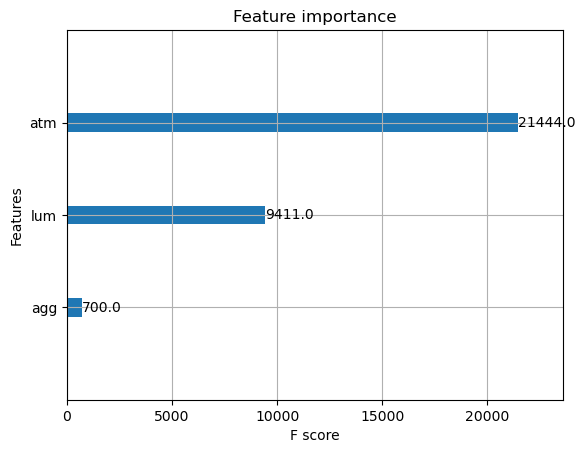

In [ ]:
xgb.plot_importance(xgb2, max_num_features=4);                                  # On affiche le graphique d'importance du modèle

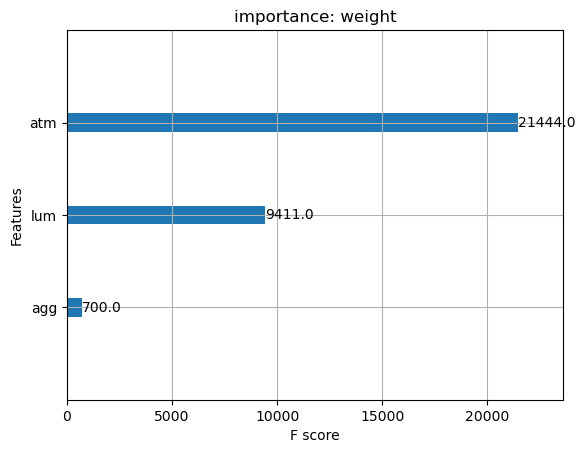

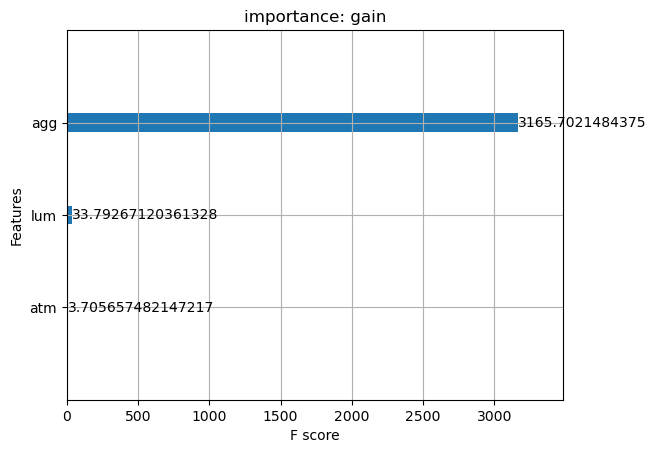

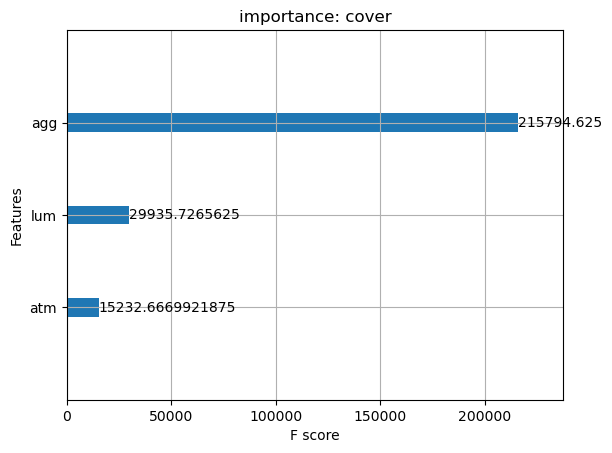

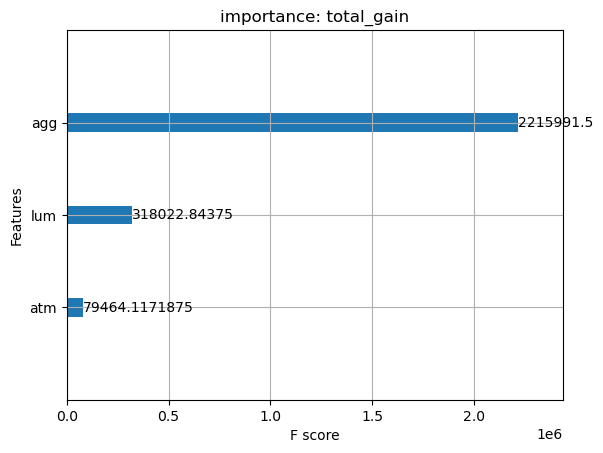

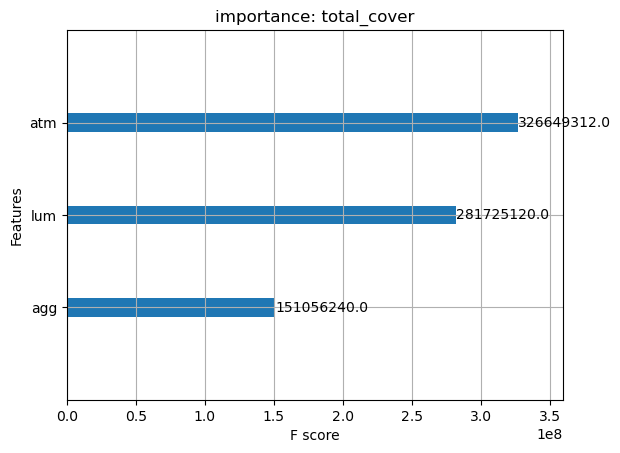

In [ ]:
types_XG2= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']             # On crée une liste avec différentes métriques
for f in types_XG2:                                                             # On affiche l'importances des features en fonction des différentes métriques
    xgb.plot_importance(xgb2 ,max_num_features=4, importance_type=f, title='importance: '+f);

In [ ]:
bst_cv_XG2 = xgb.cv(params=params_XG2,dtrain=train_XG2,num_boost_round=100,nfold=3,early_stopping_rounds=60)       # On stocke les résultats obtenus par cross-validation sur le jeu d'entrainement
bst_cv_XG2                                                                      # On affiche bst_cv_XG2


,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.689937,0.000003,0.689938,0.000002
1,0.686791,0.000006,0.686792,0.000003
2,0.683706,0.000009,0.683708,0.000005
3,0.680683,0.000012,0.680685,0.000006
4,0.677719,0.000015,0.677721,0.000008
...,...,...,...,...
95,0.548990,0.000153,0.549030,0.000140
96,0.548432,0.000153,0.548473,0.000141
97,0.547885,0.000154,0.547926,0.000143
98,0.547347,0.000155,0.547389,0.000144


In [ ]:
preds_XG2 = xgb2.predict(test_XG2)                                              # On stocke les probalités obtenues avec le modèle sur le jeux de test
xgbpreds_XG2 = pd.Series(np.where(preds_XG2 > 0.5,1,0))                         # On crée un series contenant les labels correspondant aux probabilités obtenues
y_test_XG2=pd.Series(y_test_XG2).reset_index()['grav'] 
pd.crosstab(xgbpreds_XG2, pd.Series(y_test_XG2))                                # On affiche la matrice de confusion


grav,0,1
row_0,,
0,31590,10240
1,2,1


In [ ]:
xgb2.eval(valid_XG2)                                                            # On calcul et affiche l'erreur du model sur l'échantillon de validation


'[0]\teval-logloss:0.51742726528402738'

In [ ]:
print(classification_report(y_test_XG2,xgbpreds_XG2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87    222116
           1       0.39      0.00      0.00     67029

    accuracy                           0.77    289145
   macro avg       0.58      0.50      0.43    289145
weighted avg       0.68      0.77      0.67    289145



In [ ]:
df_lum_RF2 = df_lum                                                             # On crée un nouveau DF pour le test Random Forest
target_RF2 = df_lum_RF2['grav']                                                 # On met la variable à prédire dans un df
data_RF2 = df_lum_RF2.drop(['grav'],axis=1)                                     # On met les variables explicatives dans un df


In [ ]:
X_train_RF2, X_test_RF2, y_train_RF2, y_test_RF2 = train_test_split(data_RF2, target_RF2, test_size=0.2, random_state=1234)                       # On crée un ensemble d'entrainement et un autre de test


In [ ]:
clf_2 = RandomForestClassifier(n_jobs=-1, random_state=1234 )          # On crée un classifieur Random Forest
clf_2.fit(X_train_RF2, y_train_RF2)                                             # On entraine le classifieur sur le jeu d'entrainement


RandomForestClassifier(n_jobs=-1, random_state=1234)

In [ ]:
y_pred_RF2 = clf_2.predict(X_test_RF2)                                          # On effectue les prédictions du modèle sur le jeu de test
pd.crosstab(y_test_RF2, y_pred_RF2, rownames=['CLasse réelle'], colnames=['Classe prédite'])                      # On affiche la matrice de confusion


Classe prédite,0,1
CLasse réelle,,
0,224758,52790
1,55925,27958


In [ ]:
print(classification_report(y_test_RF2, y_pred_RF2))                            # On affiche le rapport de résultat sur le jeu de test


              precision    recall  f1-score   support

           0       0.80      0.81      0.81    277548
           1       0.35      0.33      0.34     83883

    accuracy                           0.70    361431
   macro avg       0.57      0.57      0.57    361431
weighted avg       0.70      0.70      0.70    361431



# Analyse par rapport à la densité des departement

In [ ]:
# Filtrage sur les departements les moins denses pour voir s'il y a meilleur prevision

df_projet_brut_3['dep'].value_counts().head(10)

750    161150
130    113899
930     74751
920     66216
940     64861
60      61716
690     57343
590     52053
330     51120
910     37634
Name: dep, dtype: int64

In [ ]:
# Selection des departements les moins denses et en métropole
# Exclusion des 10 dep les plus denses Insee et des TOM
# dep_dense = ['750', '920', '940', '780', '690', '590', '130',930, 950, 910, 60]
# dep_TOM = ['971', '972', '973', '974', '975', '976']

index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 971 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 972 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 973 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 974 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 976 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 750 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 920 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 940 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 780 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 690 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 590 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 130 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 930 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 950 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 910 ].index
df_projet_brut_3.drop(index_names, inplace = True)
index_names = df_projet_brut_3[ df_projet_brut_3['dep'] == 60 ].index
df_projet_brut_3.drop(index_names, inplace = True)


In [ ]:
df_dep = df_projet_brut_3
df_dep.head(10)

,index,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,catv,...,larrout,surf,situ,env1,New_secu,num_veh_A01,num_veh_B01,num_veh_B02,num_veh_C01,num_veh_C03
387,387,1,1,1,5.0,0.0,0.0,0.0,1938.0,2.0,...,76.0,1.0,1.0,0.0,0.0,1,0,0,0,0
388,388,1,0,1,4.0,0.0,0.0,0.0,1976.0,4.0,...,76.0,1.0,1.0,0.0,0.0,0,0,1,0,0
389,389,1,1,1,0.0,0.0,0.0,0.0,1936.0,2.0,...,73.0,1.0,3.0,99.0,1.0,1,0,0,0,0
390,390,1,1,2,2.0,0.0,0.0,0.0,1994.0,2.0,...,72.0,1.0,1.0,0.0,0.0,1,0,0,0,0
391,391,1,1,2,5.0,0.0,0.0,0.0,1959.0,2.0,...,72.0,1.0,1.0,0.0,0.0,0,0,1,0,0
392,392,1,1,2,4.0,0.0,0.0,0.0,1969.0,3.0,...,73.0,2.0,1.0,99.0,1.0,1,0,0,0,0
393,393,2,0,2,0.0,0.0,0.0,0.0,2002.0,3.0,...,73.0,2.0,1.0,99.0,1.0,1,0,0,0,0
394,394,2,0,2,0.0,0.0,0.0,0.0,2002.0,3.0,...,73.0,2.0,1.0,99.0,1.0,1,0,0,0,0
395,395,2,0,1,0.0,0.0,0.0,0.0,2003.0,3.0,...,73.0,2.0,1.0,99.0,1.0,1,0,0,0,0
396,396,2,0,2,0.0,0.0,0.0,0.0,2003.0,3.0,...,73.0,2.0,1.0,99.0,1.0,1,0,0,0,0


In [ ]:
target=df_dep['grav']
feats=df_dep.drop(['grav'],1)
data = feats[keep_feats]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1234)

/var/folders/_1/yttpv42s1936z_r_f3zkvchc0000gn/T/ipykernel_7439/1573923100.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feats=df_dep.drop(['grav'],1)


In [ ]:
cRF = RandomForestClassifier(n_estimators = 300, criterion = 'log_loss', max_features= 0.5, n_jobs=-1, random_state=1234 )
cRF.fit(X_train, y_train)

y_pred = cRF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['CLasse réelle'], colnames=['Classe prédite'])

KeyError: 'log_loss'

In [ ]:
print(cRF.score(X_test, y_test))
print(classification_report(y_test, y_pred))

/Users/fabricebazinimac/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:871: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

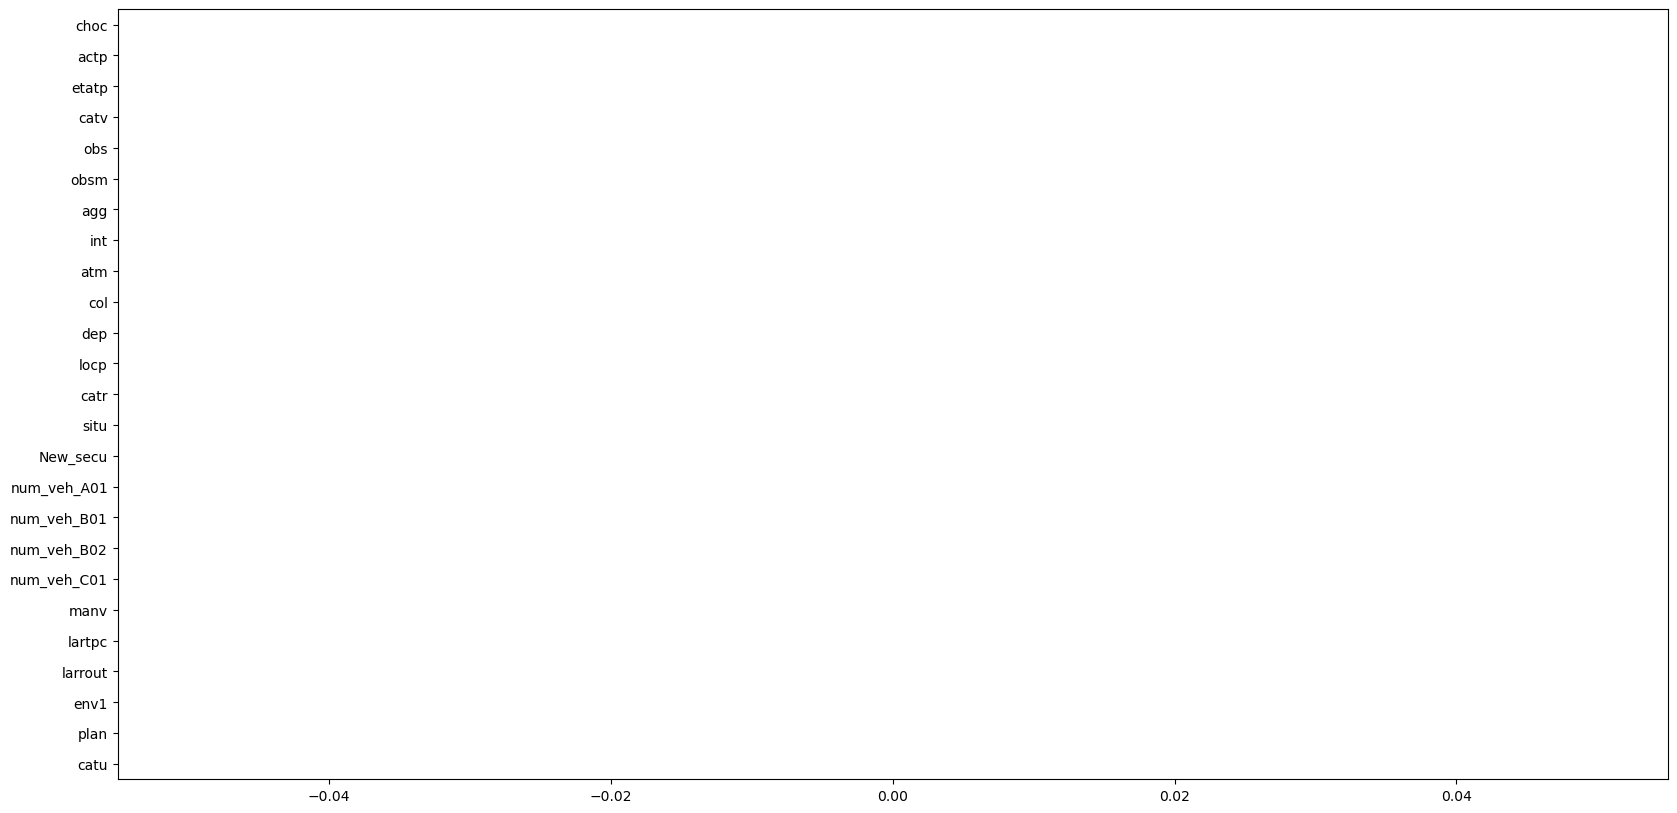

In [ ]:
feat_importance = pd.Series(cRF.feature_importances_, index=X_train.columns)
feat_importance.nlargest(30).plot(kind='barh',figsize= (20,10));

In [ ]:
# Les dept gardent un poids important dans la calssification
# Supprimons les dept pour voir les features sans cet element

data = data.drop(['dep'], axis = 1)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1234)
cRF = RandomForestClassifier(n_estimators = 300, criterion = 'log_loss', max_features= 0.5, n_jobs=-1, random_state=1234 )
cRF.fit(X_train, y_train)

y_pred = cRF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['CLasse réelle'], colnames=['Classe prédite'])

KeyError: 'log_loss'

In [ ]:
print(cRF.score(X_test, y_test))
print(classification_report(y_test, y_pred))

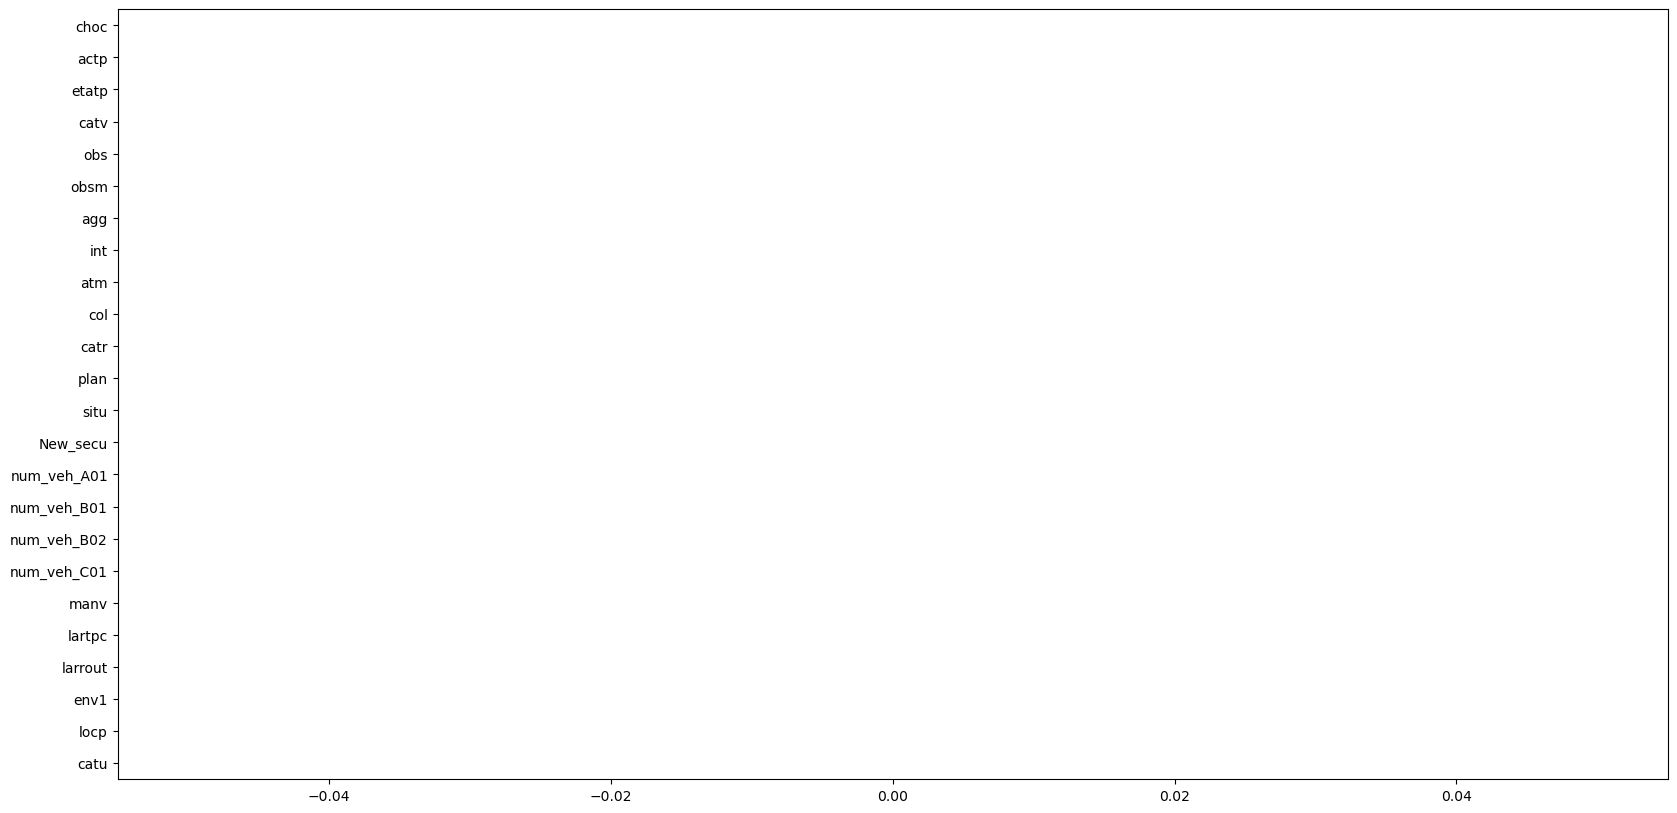

In [ ]:
feat_importance = pd.Series(cRF.feature_importances_, index=X_train.columns)
feat_importance.nlargest(30).plot(kind='barh',figsize= (20,10));

# Test avec un modele de spectron multicouche simple

In [ ]:
inputs = Input(shape = X_train.shape[1], name = "Input")

dense1 = Dense(units = 10, activation = "relu", name = "Dense_1")
dense2 = Dense(units = 10, activation = "relu", name = "Dense_2")
dense3 = Dense(units = 10, activation = "relu", name = "Dense_3")
dense4 = Dense(units = 2, activation = "softmax", name = "Dense_4")

x=dense1(inputs)
x=dense2(x)
x=dense3(x)
outputs=dense4(x)

model = Model(inputs = inputs, outputs = outputs)

2022-11-14 18:22:20.228891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

model.fit(X_train,y_train,epochs=40,batch_size=64,validation_split=0.1)

y_pred = model.predict(X_test)

Epoch 1/40
11368/11368 [==============================] - 9s 789us/step - loss: 0.5276 - accuracy: 0.7292 - val_loss: 0.4997 - val_accuracy: 0.7465
Epoch 2/40
11368/11368 [==============================] - 9s 830us/step - loss: 0.4920 - accuracy: 0.7508 - val_loss: 0.4831 - val_accuracy: 0.7596
Epoch 3/40
11368/11368 [==============================] - 9s 827us/step - loss: 0.4820 - accuracy: 0.7572 - val_loss: 0.4773 - val_accuracy: 0.7615
Epoch 4/40
11368/11368 [==============================] - 9s 765us/step - loss: 0.4785 - accuracy: 0.7595 - val_loss: 0.4757 - val_accuracy: 0.7616
Epoch 5/40
11368/11368 [==============================] - 9s 763us/step - loss: 0.4760 - accuracy: 0.7615 - val_loss: 0.4728 - val_accuracy: 0.7634
Epoch 6/40
11368/11368 [==============================] - 9s 781us/step - loss: 0.4750 - accuracy: 0.7618 - val_loss: 0.4741 - val_accuracy: 0.7635
Epoch 7/40
11368/11368 [==============================] - 9s 762us/step - loss: 0.4743 - accuracy: 0.7620 - val_

In [ ]:
test_pred = model.predict(X_test)


y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

6316/6316 [==============================] - 3s 531us/step


In [ ]:
print(classification_report(y_test_class,y_pred_class))
pd.crosstab(y_test_class, y_pred_class, rownames=['CLasse réelle'], colnames=['Classe prédite'])


              precision    recall  f1-score   support

           0       0.79      0.91      0.85    143064
           1       0.67      0.43      0.52     59030

    accuracy                           0.77    202094
   macro avg       0.73      0.67      0.68    202094
weighted avg       0.76      0.77      0.75    202094



Classe prédite,0,1
CLasse réelle,,
0,130505,12559
1,33941,25089
